In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

In [13]:
data = pd.read_csv('PAandAoBIndemnity.csv')

In [14]:
data

,AoB,PolicyInsuredPropertyAge,Avg. Corrected Incurred Indemnity
0,0,1,52000.000000
1,0,2,9013.310714
2,0,3,4574.659444
3,0,4,4861.597273
4,0,5,3841.436000
5,0,6,2079.211111
6,1,7,12500.000000
7,0,7,11487.075000
8,0,8,1883.333333
9,1,9,17412.770000


In [15]:
data.describe()

,AoB,PolicyInsuredPropertyAge,Avg. Corrected Incurred Indemnity
count,129.000000,129.000000,129.000000
mean,0.418605,37.891473,17188.594146
std,0.495254,20.097901,11716.439424
min,0.000000,1.000000,0.000000
25%,0.000000,21.000000,9245.138182
50%,0.000000,38.000000,14302.224000
75%,1.000000,55.000000,20470.957963
max,1.000000,75.000000,62250.060000


In [16]:
# Following the regression equation, our dependent variable (y) is the Avg. Corrected Incurred Indemnity
y = data ['Avg. Corrected Incurred Indemnity']
# Similarly, our independent variable (x) is the PolicyInsuredPropertyAge and AoB
x1 = data [['PolicyInsuredPropertyAge','AoB']]

In [17]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Avg. Corrected Incurred Indemnity   R-squared:                       0.101
Model:                                           OLS   Adj. R-squared:                  0.087
Method:                                Least Squares   F-statistic:                     7.087
Date:                               Fri, 15 Mar 2019   Prob (F-statistic):            0.00121
Time:                                       11:18:23   Log-Likelihood:                -1384.2
No. Observations:                                129   AIC:                             2774.
Df Residuals:                                    126   BIC:                             2783.
Df Model:                                          2                                         
Covariance Type:                           nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.431e+04   2274.317      6.291      0.000    9806.476    1.88e+04
PolicyInsuredPropertyAge    -6.9860     49.240     -0.142      0.887    -104.431      90.459
AoB                       7515.4943   1998.224      3.761      0.000    3561.068    1.15e+04
==============================================================================
Omnibus:                       32.875   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.606
Skew:                           1.209   Prob(JB):                     2.29e-12
Kurtosis:                       5.032   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

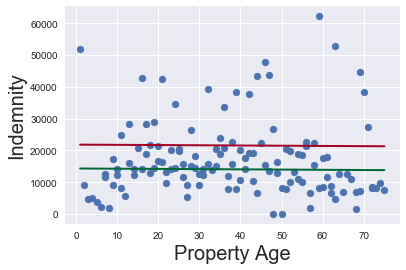

In [19]:
# Create a scatter plot of SAT and GPA
plt.scatter(data['PolicyInsuredPropertyAge'],y)
# Define the two regression equations, depending on whether they attended (yes), or didn't (no)
yhat_no = 14310 - 6.9860*data['PolicyInsuredPropertyAge']
yhat_yes = 21825.4943 - 6.9860*data['PolicyInsuredPropertyAge']
# Plot the two regression lines
fig = plt.plot(data['PolicyInsuredPropertyAge'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['PolicyInsuredPropertyAge'],yhat_yes, lw=2, c='#a50026')
# Name your axes :)
plt.xlabel('Property Age', fontsize = 20)
plt.ylabel('Indemnity', fontsize = 20)
plt.show()

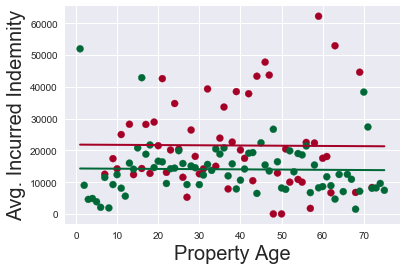

In [22]:
# In this code I want to colour the points depending on attendance
# Note: This code would have been very easy in Seaborn

# Create one scatter plot which contains all observations
# Use the series 'Attendance' as color, and choose a colour map of your choice
# The colour map we've chosen is completely arbitrary
plt.scatter(data['PolicyInsuredPropertyAge'],data['Avg. Corrected Incurred Indemnity'], c=data['AoB'],cmap='RdYlGn_r')

# Define the two regression equations (one with a dummy = 1, the other with dummy = 0)
# We have those above already, but for the sake of consistency, we will also include them here
yhat_no = 14310 - 6.9860*data['PolicyInsuredPropertyAge']
yhat_yes = 21825.4943 - 6.9860*data['PolicyInsuredPropertyAge']

# Plot the two regression lines
fig = plt.plot(data['PolicyInsuredPropertyAge'],yhat_no, lw=2, c='#006837')
fig = plt.plot(data['PolicyInsuredPropertyAge'],yhat_yes, lw=2, c='#a50026')
plt.xlabel('Property Age', fontsize = 20)
plt.ylabel('Avg. Incurred Indemnity', fontsize = 20)
plt.show()